In [1]:


import os

In [2]:
!pip install timm

In [3]:
import backbones_unet

print(backbones_unet.__available_models__)
from backbones_unet.model.unet import Unet
from backbones_unet.utils.dataset import SemanticSegmentationDataset
from backbones_unet.model.losses import DiceLoss
from backbones_unet.utils.trainer import Trainer
from torchsummary import summary
import torch
import torch.nn as nn
import timm
import torch
from torch.utils.data import DataLoader  # Import the DataLoader
from torchvision import transforms

['convnext_atto', 'convnext_atto_ols', 'convnext_base', 'convnext_base_384_in22ft1k', 'convnext_base_in22ft1k', 'convnext_base_in22k', 'convnext_femto', 'convnext_femto_ols', 'convnext_large', 'convnext_large_384_in22ft1k', 'convnext_large_in22ft1k', 'convnext_large_in22k', 'convnext_nano', 'convnext_nano_ols', 'convnext_pico', 'convnext_pico_ols', 'convnext_small', 'convnext_small_384_in22ft1k', 'convnext_small_in22ft1k', 'convnext_small_in22k', 'convnext_tiny', 'convnext_tiny_384_in22ft1k', 'convnext_tiny_hnf', 'convnext_tiny_in22ft1k', 'convnext_tiny_in22k', 'convnext_xlarge_384_in22ft1k', 'convnext_xlarge_in22ft1k', 'convnext_xlarge_in22k', 'cs3darknet_focus_l', 'cs3darknet_focus_m', 'cs3darknet_l', 'cs3darknet_m', 'cs3darknet_x', 'cs3edgenet_x', 'cs3se_edgenet_x', 'cs3sedarknet_l', 'cs3sedarknet_x', 'cspdarknet53', 'cspresnet50', 'cspresnext50', 'darknet53', 'darknetaa53', 'densenet121', 'densenet161', 'densenet169', 'densenet201', 'densenetblur121d', 'dm_nfnet_f0', 'dm_nfnet_f1',

In [4]:
print(os.getcwd())

c:\Users\charl\Research\442Proj\pretrained-backbones-unet


In [5]:
print(timm.list_models())

['bat_resnext26ts', 'beit_base_patch16_224', 'beit_base_patch16_384', 'beit_large_patch16_224', 'beit_large_patch16_384', 'beit_large_patch16_512', 'beitv2_base_patch16_224', 'beitv2_large_patch16_224', 'botnet26t_256', 'botnet50ts_256', 'caformer_b36', 'caformer_m36', 'caformer_s18', 'caformer_s36', 'cait_m36_384', 'cait_m48_448', 'cait_s24_224', 'cait_s24_384', 'cait_s36_384', 'cait_xs24_384', 'cait_xxs24_224', 'cait_xxs24_384', 'cait_xxs36_224', 'cait_xxs36_384', 'coat_lite_medium', 'coat_lite_medium_384', 'coat_lite_mini', 'coat_lite_small', 'coat_lite_tiny', 'coat_mini', 'coat_small', 'coat_tiny', 'coatnet_0_224', 'coatnet_0_rw_224', 'coatnet_1_224', 'coatnet_1_rw_224', 'coatnet_2_224', 'coatnet_2_rw_224', 'coatnet_3_224', 'coatnet_3_rw_224', 'coatnet_4_224', 'coatnet_5_224', 'coatnet_bn_0_rw_224', 'coatnet_nano_cc_224', 'coatnet_nano_rw_224', 'coatnet_pico_rw_224', 'coatnet_rmlp_0_rw_224', 'coatnet_rmlp_1_rw2_224', 'coatnet_rmlp_1_rw_224', 'coatnet_rmlp_2_rw_224', 'coatnet_rmlp_2

In [6]:
model = Unet(
    backbone='convnext_base', # backbone network name
    in_channels=3,            # input channels (1 for gray-scale images, 3 for RGB, etc.)
    num_classes=1,            # output channels (number of classes in your dataset)
)

In [7]:
print(sum(s.numel() for s in model.parameters()))

92651345


In [8]:
model2 = timm.create_model('convnext_base', pretrained=True)
print(model2.default_cfg)

{'url': 'https://dl.fbaipublicfiles.com/convnext/convnext_base_22k_1k_224.pth', 'hf_hub_id': 'timm/convnext_base.fb_in22k_ft_in1k', 'architecture': 'convnext_base', 'tag': 'fb_in22k_ft_in1k', 'custom_load': False, 'input_size': (3, 224, 224), 'test_input_size': (3, 288, 288), 'fixed_input_size': False, 'interpolation': 'bicubic', 'crop_pct': 0.875, 'test_crop_pct': 1.0, 'crop_mode': 'center', 'mean': (0.485, 0.456, 0.406), 'std': (0.229, 0.224, 0.225), 'num_classes': 1000, 'pool_size': (7, 7), 'first_conv': 'stem.0', 'classifier': 'head.fc'}


In [9]:
!nvidia-smi

Sun Apr 21 16:38:30 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.61                 Driver Version: 551.61         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   42C    P8              2W /   80W |     171MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [17]:

from backbones_unet.model.unet import Unet
from backbones_unet.utils.dataset import SemanticSegmentationDataset
from backbones_unet.model.losses import DiceLoss
from backbones_unet.utils.trainer import Trainer
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to 224x224 pixels       # Convert the image to a tensor  # and standard deviation
])
train_img_path = 'C:\\Users\\charl\\Research\\442Proj\\data\\1803241944\\clip_00000000'
train_mask_path = 'C:\\Users\\charl\\Research\\442Proj\\data\\1803241944\\matting_00000000'
print(os.listdir(train_mask_path))
val_img_path = '/content/drive/MyDrive/442_final_project/projectfile/clip_img/1803251920'
val_mask_path = '/content/drive/MyDrive/442_final_project/projectfile/clip_img/1803251920'
train_dataset = SemanticSegmentationDataset(train_img_path, train_mask_path,normalize=transform)
val_dataset = SemanticSegmentationDataset(val_img_path, val_mask_path,normalize=transform)
train_loader = DataLoader(train_dataset, batch_size=2)
val_loader = DataLoader(val_dataset, batch_size=2)
print(train_dataset.img_paths)
print(train_dataset.mask_paths)
print(val_dataset.img_paths)
print(val_dataset.mask_paths)

params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.AdamW(params, 1e-4)

trainer = Trainer(
    model,                    # UNet model with pretrained backbone
    criterion=DiceLoss(),     # loss function for model convergence
    optimizer=optimizer,      # optimizer for regularization
    epochs=10                 # number of epochs for model training
)


['1803241944-00000001.png', '1803241944-00000002.png', '1803241944-00000006.png', '1803241944-00000007.png', '1803241944-00000012.png', '1803241944-00000017.png', '1803241944-00000019.png', '1803241944-00000027.png', '1803241944-00000028.png', '1803241944-00000029.png', '1803241944-00000030.png', '1803241944-00000032.png', '1803241944-00000036.png', '1803241944-00000042.png', '1803241944-00000046.png', '1803241944-00000047.png', '1803241944-00000049.png', '1803241944-00000050.png', '1803241944-00000051.png', '1803241944-00000053.png', '1803241944-00000060.png', '1803241944-00000063.png', '1803241944-00000067.png', '1803241944-00000072.png', '1803241944-00000075.png', '1803241944-00000078.png', '1803241944-00000080.png', '1803241944-00000082.png', '1803241944-00000084.png', '1803241944-00000086.png', '1803241944-00000091.png', '1803241944-00000092.png', '1803241944-00000102.png', '1803241944-00000103.png', '1803241944-00000105.png', '1803241944-00000106.png', '1803241944-00000108.png', 

c:\Users\charl\Research\442Proj\pretrained-backbones-unet\backbones_unet\utils\trainer.py:128: UserWarning: Device was automatically selected: cpu
  warnings.warn(msg)


torch.Size([2, 3, 224, 224])
torch.Size([2, 1, 224, 224])
tensor([[[[0.9059, 0.9098, 0.9137,  ..., 1.0000, 1.0000, 1.0000],
          [0.8941, 0.8980, 0.9020,  ..., 1.0000, 1.0000, 1.0000],
          [0.8902, 0.8902, 0.8902,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.3020, 0.2863, 0.2706,  ..., 0.3176, 0.3294, 0.3569],
          [0.3216, 0.3176, 0.3059,  ..., 0.3294, 0.3020, 0.3412],
          [0.2863, 0.2588, 0.2863,  ..., 0.3020, 0.3373, 0.3529]],

         [[0.9569, 0.9608, 0.9647,  ..., 1.0000, 1.0000, 1.0000],
          [0.9451, 0.9490, 0.9490,  ..., 1.0000, 1.0000, 1.0000],
          [0.9373, 0.9373, 0.9373,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.2902, 0.2745, 0.2588,  ..., 0.2941, 0.3059, 0.3333],
          [0.3098, 0.3059, 0.2941,  ..., 0.3059, 0.2784, 0.3176],
          [0.2745, 0.2471, 0.2745,  ..., 0.2784, 0.3098, 0.3294]],

         [[0.9922, 0.9922, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
          [0.9843, 0.9843, 0.9882,  ..., 1.0000, 1

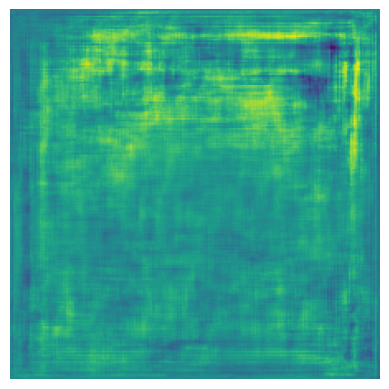

In [18]:
import matplotlib.pyplot as plt
import numpy as np
for i, (inputs, labels) in enumerate(train_loader):
        # Your training process, e.g., forward pass, backward pass, optimize, etc.
        print(inputs.shape)
        print(labels.shape)
        inputs = inputs
        print(inputs)
        outputs = model.predict(inputs)
# Ensure it's suitable for display: clip values to be within the interval [0, 1]
        image = outputs[0,0,:,:]
# Display the image
        
        plt.imshow(image)
        plt.axis('off')  # Turn off axis numbers and ticks
        plt.show()
        break
        

torch.Size([3, 224, 224])
tensor([[[-1.2212,  3.4583,  1.6494,  ...,  4.9342, -0.0761,  5.7156],
         [ 4.3943, 11.6950,  6.2412,  ...,  5.4776,  3.3457,  8.4562],
         [ 5.1311, 13.5303, 10.2142,  ...,  9.1482, -1.7089,  8.2721],
         ...,
         [-0.3086,  1.3148,  5.9606,  ...,  7.2763,  0.4603, -3.0522],
         [ 5.4897,  5.2974,  5.0465,  ...,  5.6467, -2.8408, -8.5899],
         [ 2.9550,  2.3504,  2.2131,  ...,  1.2643, -4.0917, -6.3615]]])
torch.Size([1, 224, 224])
torch.float32


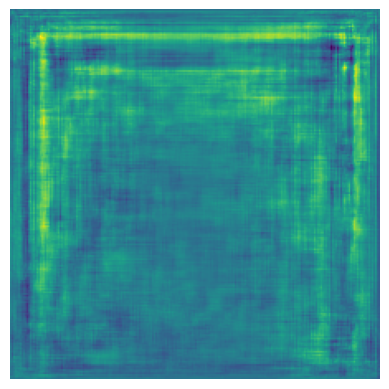

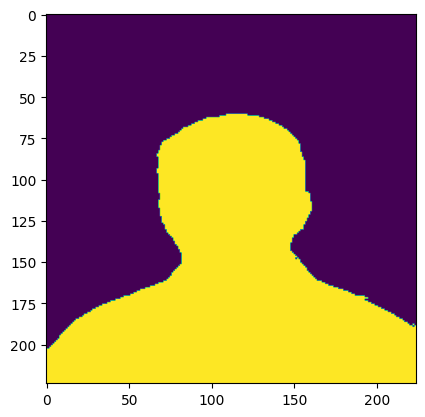

torch.Size([3, 224, 224])
tensor([[[-2.3279,  2.5451,  2.0945,  ...,  5.9432,  1.0218,  5.5743],
         [ 4.5387, 11.0999,  6.7039,  ...,  3.5449,  2.4268,  8.0455],
         [ 5.9138, 11.4983,  7.8710,  ...,  8.0073, -1.0641,  7.6301],
         ...,
         [ 4.2134,  4.7087, 12.3627,  ...,  6.9227,  1.4370, -4.1964],
         [10.9417,  8.4075, 10.4032,  ...,  4.0327, -3.4501, -8.4321],
         [ 4.7896,  2.9283,  3.2048,  ...,  1.4307, -3.2385, -4.4645]]])
torch.Size([1, 224, 224])
torch.float32


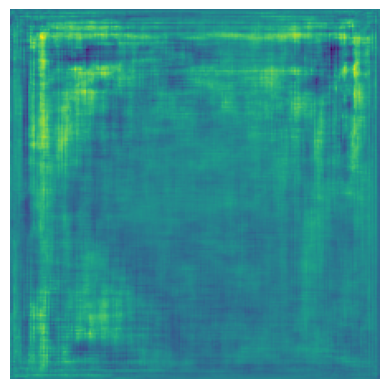

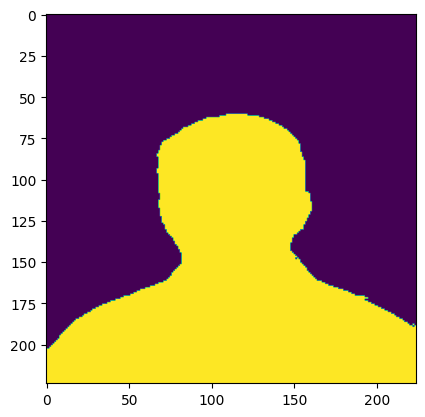

In [20]:
from PIL import Image

def testout(paths_img,paths_matting):
    
    for i in range(len(paths_img)):
        path = paths_img[i]
        path_mat = paths_matting[i]
        img = Image.open(path).convert("RGB")
        img = img.resize((224,224)) 
        img = torch.Tensor(np.array(img, dtype=np.uint8).transpose((2, 0, 1)))
        print(img.shape)
        inputs = transform(img)
        inputs = inputs.float() / 255.0
        outputs = model.predict(inputs[None,...])
        mask = Image.open(path_mat)
        mask = mask.resize((224, 224)) 
        mask = np.array(mask)
        mask = torch.as_tensor(mask, dtype=torch.uint8)
        mask = mask[...,3]
        #print(mask)
# Ensure it's suitable for display: clip values to be within the interval [0, 1]
        print(outputs[0])
        image = outputs[0]
        print(image.shape)
# Display the image
        image = image.permute(1, 2, 0).int()
        print(image.dtype)
        plt.imshow(image)
        plt.axis('off')  # Turn off axis numbers and ticks
        plt.show() # Print the labels
        plt.imshow(torch.squeeze(labels[0]))
        plt.show()
    # Use the data as needed:
    # For example, you might pass `inputs` to a model to make predictions:
    # outputs = model(inputs)

        if i == 1:  # This stops the loop after the fifth batch
            break

testout(train_dataset.img_paths,train_dataset.mask_paths)

In [ ]:
print(train_dataset.img_paths)

['C:\\Users\\charl\\Research\\442Proj\\data\\1803241944\\clip_00000000\\1803241944-00000001.jpg', 'C:\\Users\\charl\\Research\\442Proj\\data\\1803241944\\clip_00000000\\1803241944-00000002.jpg', 'C:\\Users\\charl\\Research\\442Proj\\data\\1803241944\\clip_00000000\\1803241944-00000006.jpg', 'C:\\Users\\charl\\Research\\442Proj\\data\\1803241944\\clip_00000000\\1803241944-00000007.jpg', 'C:\\Users\\charl\\Research\\442Proj\\data\\1803241944\\clip_00000000\\1803241944-00000012.jpg', 'C:\\Users\\charl\\Research\\442Proj\\data\\1803241944\\clip_00000000\\1803241944-00000017.jpg', 'C:\\Users\\charl\\Research\\442Proj\\data\\1803241944\\clip_00000000\\1803241944-00000019.jpg', 'C:\\Users\\charl\\Research\\442Proj\\data\\1803241944\\clip_00000000\\1803241944-00000027.jpg', 'C:\\Users\\charl\\Research\\442Proj\\data\\1803241944\\clip_00000000\\1803241944-00000028.jpg', 'C:\\Users\\charl\\Research\\442Proj\\data\\1803241944\\clip_00000000\\1803241944-00000029.jpg', 'C:\\Users\\charl\\Research\\

In [ ]:
trainer.fit(train_loader, val_loader)

Traning Model on 10 epochs:   0%|          | 0/10 [00:20<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
from backbones_unet.model.unet import Unet
import torch
from backbones_unet.utils.reproducibility import set_seed
from backbones_unet.utils.dataset import SemanticSegmentationDataset
from backbones_unet.model.losses import DiceLoss
from backbones_unet.utils.trainer import Trainer

# set_seed()

random_tensor = torch.rand((1, 3, 64, 64))

model = Unet(in_channels=3, num_classes=2)

print(model.predict(random_tensor))

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

tensor([[[[ -0.0755,  -0.5068,  -1.1575,  ...,  -1.4250,  -1.1256,   3.0101],
          [ -0.9720,  -0.3597,  -1.6200,  ...,  -1.3570,   0.3929,   2.4912],
          [ -0.9097,  -2.9884,  -2.8543,  ...,  -1.6979,   0.3810,   2.6795],
          ...,
          [ -3.7063,  -5.7350,  -4.1561,  ...,   1.0848,   2.9536,   0.5882],
          [ -6.1461,  -9.6332, -11.7163,  ...,  -6.4072,  -1.5270,  -0.8682],
          [ -1.9437,  -6.6462,  -6.2817,  ...,  -5.0385,  -4.5192,  -1.5219]],

         [[  0.5589,  -0.2389,  -1.3446,  ...,   0.2540,   1.5547,   4.1252],
          [  0.3958,  -0.6109,  -0.2318,  ...,   0.9458,   0.4273,   5.5824],
          [ -0.2082,  -0.9953,  -0.4047,  ...,   0.0433,   2.0944,   4.2243],
          ...,
          [ -0.7268,   3.1239,   3.8765,  ...,   4.9016,   4.7652,   1.9430],
          [  0.9326,   8.3134,   7.9925,  ...,   6.2604,   2.9644,   1.4515],
          [  1.9073,   6.2674,   7.1101,  ...,   8.0781,   6.3982,   3.1099]]]])


c:\Users\charl\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\charl\.cache\huggingface\hub\models--timm--resnet50.a1_in1k. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


torch.Size([2, 3, 224, 224])
torch.Size([2, 1, 224, 224])


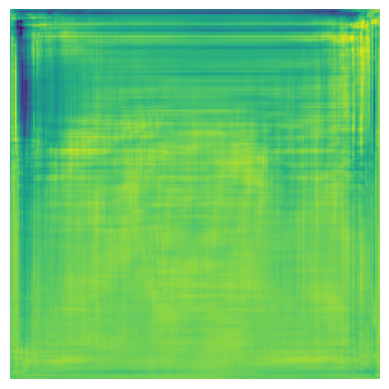

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
for i, (inputs, labels) in enumerate(train_loader):
        # Your training process, e.g., forward pass, backward pass, optimize, etc.
        print(inputs.shape)
        print(inputs)
        print(labels.shape)
        outputs = model.predict(inputs)
# Ensure it's suitable for display: clip values to be within the interval [0, 1]
        image = outputs[0,0,:,:]
# Display the image
        
        plt.imshow(image)
        plt.axis('off')  # Turn off axis numbers and ticks
        plt.show()
        break